In [4]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [5]:
## Avoid printing out warnings
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
X, y = load_boston(return_X_y=True)

/home/nyuad/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [6]:
# scale the data
scaler = StandardScaler()
scaler_fit =scaler.fit(X)
X = scaler_fit.transform(X)

### Explore the Dataset

In [7]:
data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/home/nyuad/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [8]:
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Linear Regression

Fit a linear regression model using the closed-form solution presented in class. Use
k-fold cross-validation to estimate the performance of this model. Print the average of
your recorded scores for both the test set and training set.

In [10]:
def closed_form(X, y):
    X_b = np.c_[np.ones((X.shape[0],1)), X]
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta_best

In [11]:
# predicts the target for the given features based on the weights provided
def predict(X, theta_best):
    return X.dot(theta_best)

In [12]:
# returns root mean squared error
def mse(actual, predicted):
    diff = np.subtract(np.array(actual), np.array(predicted)) # difference
    squared = np.square(diff) # square the difference
    return np.sqrt(squared.mean()) # find the mean of the squares and then calculate square root

In [13]:
# performing k fold validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

train_scores = [0, 0, 0 , 0, 0]
test_scores = [0, 0, 0, 0, 0]

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index]
    y_train = y[train_index]
    theta = closed_form(X_train, y_train)
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train] # add the bias term
    train_pred = predict(X_b, theta) # predict for the train set
    train_mse = mse(y_train, train_pred) # calculate rmse
    train_scores[i] = train_mse
    
    X_test = X[test_index]
    y_test = y[test_index]
    X_b2 = np.c_[np.ones((X_test.shape[0], 1)), X_test] # add the bias term
    test_pred = predict(X_b2, theta) # predict for the test set
    test_mse = mse(y_test, test_pred) # calculate rmse
    test_scores[i] = test_mse

# print the average of the rmse
print(sum(train_scores)/len(train_scores))
print(sum(test_scores)/len(test_scores))

4.528110235625726
5.828658946215807


### Ridge Regression
Fit a ridge regression model using the closed solution from written question 1. Use kfold cross-validation to find the best λ.
Ans: Best λ = 10

In [14]:
def ridge_closed_form(X, y, alpha):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    A = np.identity(X_b.shape[1])
    theta_best = np.linalg.inv(X_b.T.dot(X_b) + alpha * A).dot(X_b.T).dot(y)
    return theta_best

In [15]:
alphas =  np.logspace(1, 7, num=13) 

In [16]:
# dictionary with key = alpha, value = list of rmses for k fold cross validation
overall_train_scores = dict()
overall_test_scores = dict()
  
for alpha in alphas:
    overall_train_scores[alpha] = []
    overall_test_scores[alpha] = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train = X[train_index]
        y_train = y[train_index]
        theta_ridge = ridge_closed_form(X_train, y_train, alpha)
        X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        train_pred = predict(X_b, theta_ridge) 
        train_mse = mse(y_train, train_pred)
        overall_train_scores[alpha].append(train_mse)
    
        X_test = X[test_index]
        y_test = y[test_index]
        X_b2 = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        test_pred = predict(X_b2, theta_ridge)
        test_mse = mse(y_test, test_pred)
        overall_test_scores[alpha].append(test_mse)
        
# print the average for each alpha
for k in overall_test_scores:
    print("alpha: ", k)
    print("test_mse: ", sum(overall_test_scores[k])/len(overall_test_scores[k]))
    print("train_mse: ", sum(overall_train_scores[k])/len(overall_train_scores[k]))

alpha:  10.0
test_mse:  5.630097894256427
train_mse:  4.580049418387733
alpha:  31.622776601683793
test_mse:  6.266099321823271
train_mse:  4.911621855747113
alpha:  100.0
test_mse:  9.199297227648945
train_mse:  6.600442391233211
alpha:  316.22776601683796
test_mse:  14.686430891704385
train_mse:  11.10593186548091
alpha:  1000.0
test_mse:  19.960587866310355
train_mse:  16.910599787428545
alpha:  3162.2776601683795
test_mse:  22.629329322926232
train_mse:  21.042216187079035
alpha:  10000.0
test_mse:  23.505417458226184
train_mse:  23.07714628178925
alpha:  31622.776601683792
test_mse:  23.766754206565206
train_mse:  23.887393199259765
alpha:  100000.0
test_mse:  23.847817361114586
train_mse:  24.170131232818942
alpha:  316227.7660168379
test_mse:  23.873383892557275
train_mse:  24.262755769616597
alpha:  1000000.0
test_mse:  23.881467252201283
train_mse:  24.292390192596244
alpha:  3162277.6601683795
test_mse:  23.8840234895602
train_mse:  24.301796587301464
alpha:  10000000.0
test_

For the best λ you found, use k-fold cross-validation to estimate the performance of this
model with this λ . Print the average of your recorded scores for both the test setand
training set.

In [17]:
best_alpha_train_scores = []
best_alpha_test_scores = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index]
    y_train = y[train_index]
    theta_ridge = ridge_closed_form(X_train, y_train, 10) # best lambda = 10
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    train_pred = predict(X_b, theta_ridge)
    train_mse = mse(y_train, train_pred) 
    best_alpha_train_scores.append(train_mse)
    
    X_test = X[test_index]
    y_test = y[test_index]
    X_b2 = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    test_pred = predict(X_b2, theta_ridge)
    test_mse = mse(y_test, test_pred)
    best_alpha_test_scores.append(test_mse)
    
# printing the averages
print(sum(best_alpha_train_scores)/len(best_alpha_train_scores))
print(sum(best_alpha_test_scores)/len(best_alpha_test_scores))

4.580049418387733
5.630097894256427


### Polynomial Transformation
Repeat the previous exercise, but this time, by creating a polynomial transformation of
degree 2 on the features of the dataset.
Ans: Best lambda = 10

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

In [19]:
# perform ridge regression on polynomial transformation
overall_train_scores = dict()
overall_test_scores = dict()

for alpha in alphas:
    overall_train_scores[alpha] = []
    overall_test_scores[alpha] = []
    for i, (train_index, test_index) in enumerate(kf.split(X_poly)):
        X_train = X_poly[train_index]
        y_train = y[train_index]
        theta_ridge = ridge_closed_form(X_train, y_train, alpha)
        X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        train_pred = predict(X_b, theta_ridge) 
        train_mse = mse(y_train, train_pred)
        overall_train_scores[alpha].append(train_mse)
    
        X_test = X_poly[test_index]
        y_test = y[test_index]
        X_b2 = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        test_pred = predict(X_b2, theta_ridge)
        test_mse = mse(y_test, test_pred)
        overall_test_scores[alpha].append(test_mse)
        

for k in overall_test_scores:
    print("alpha: ", k)
    print("test_mse: ", sum(overall_test_scores[k])/len(overall_test_scores[k]))
    print("train_mse: ", sum(overall_train_scores[k])/len(overall_train_scores[k]))

alpha:  10.0
test_mse:  5.504727629641129
train_mse:  2.5974037636011813
alpha:  31.622776601683793
test_mse:  5.54463842017774
train_mse:  3.0794140780068555
alpha:  100.0
test_mse:  6.43245125283333
train_mse:  4.004085755943747
alpha:  316.22776601683796
test_mse:  7.992514226374787
train_mse:  5.634377677932516
alpha:  1000.0
test_mse:  10.600639369191532
train_mse:  8.394101634063965
alpha:  3162.2776601683795
test_mse:  13.719921548430225
train_mse:  12.076782061120658
alpha:  10000.0
test_mse:  16.68717825841214
train_mse:  15.89409469465146
alpha:  31622.776601683792
test_mse:  19.71063124390191
train_mse:  19.546829877407855
alpha:  100000.0
test_mse:  22.057200996996762
train_mse:  22.229077769891955
alpha:  316227.7660168379
test_mse:  23.225411962662974
train_mse:  23.55420430150767
alpha:  1000000.0
test_mse:  23.666718353522395
train_mse:  24.056678019898484
alpha:  3162277.6601683795
test_mse:  23.815064679016864
train_mse:  24.226005581993277
alpha:  10000000.0
test_mse

### Linear Regression - Gradient Descent

In [20]:
def gradient_descent(eta, n_iterations, X, y):
    m = len(y)
    X_b = np.c_[np.ones((X.shape[0], 1)), X] # bias
    theta = np.zeros(X_b.shape[1]) # zero initialization
    for iteration in range(n_iterations):
        h = X_b.dot(theta) # prediction
        gradients = 2/m * X_b.T.dot(h - y)
        theta = theta - eta * gradients
    
    return theta

In [21]:
eta = 0.01  # learning rate
n_iterations = 10000

train_scores = [0, 0, 0 , 0, 0]
test_scores = [0, 0, 0, 0, 0]

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index]
    y_train = y[train_index]
    theta = gradient_descent(eta, n_iterations, X_train, y_train)
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    train_pred = predict(X_b, theta)
    train_mse = mse(y_train, train_pred)
    train_scores[i] = train_mse
    
    X_test = X[test_index]
    y_test = y[test_index]
    X_b2 = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    test_pred = predict(X_b2, theta)
    test_mse = mse(y_test, test_pred)
    test_scores[i] = test_mse
print(sum(train_scores)/len(train_scores))
print(sum(test_scores)/len(test_scores))

4.528110235699295
5.828664848740935


### Ridge Regression - Gradient Descent

In [22]:
def getRidgeGradientFunction(X_b, y, y_pred, theta, alpha):
    return  -(2/y.size) * X_b.T.dot((y - y_pred)) + alpha * theta

def gradient_descent_ridge(eta, n_iterations, X, y, alpha):
    m = len(y)
    X_b = np.c_[np.ones((X.shape[0], 1)), X] # bias
    theta = np.zeros(X_b.shape[1]) # zero initialization
    for iteration in range(n_iterations):
        y_pred = X_b.dot(theta)
        gradient = getRidgeGradientFunction(X_b, y, y_pred, theta, alpha)
        theta = theta - eta * gradient
    return theta

In [23]:
# finding the best alpha w constant learning rate
overall_train_scores = dict()
overall_test_scores = dict()
eta = 0.0000001  # learning rate
n_iterations = 1000
    
for alpha in alphas:
    overall_train_scores[alpha] = []
    overall_test_scores[alpha] = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train = X[train_index]
        y_train = y[train_index]
        theta_ridge = gradient_descent_ridge(eta, n_iterations, X_train, y_train, alpha)
        X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
        train_pred = predict(X_b, theta_ridge) 
        train_mse = mse(y_train, train_pred)
        overall_train_scores[alpha].append(train_mse)
    
        X_test = X[test_index]
        y_test = y[test_index]
        X_b2 = np.c_[np.ones((X_test.shape[0], 1)), X_test]
        test_pred = predict(X_b2, theta_ridge)
        test_mse = mse(y_test, test_pred)
        overall_test_scores[alpha].append(test_mse)
        

for k in overall_test_scores:
    print("alpha: ", k)
    print("test_mse: ", sum(overall_test_scores[k])/len(overall_test_scores[k]))
    print("train_mse: ", sum(overall_train_scores[k])/len(overall_train_scores[k]))

alpha:  10.0
test_mse:  23.88335823935835
train_mse:  24.29935062127614
alpha:  31.622776601683793
test_mse:  23.883360231873276
train_mse:  24.299357959764144
alpha:  100.0
test_mse:  23.88336651395169
train_mse:  24.299381096784998
alpha:  316.22776601683796
test_mse:  23.883386192983043
train_mse:  24.29945357457078
alpha:  1000.0
test_mse:  23.883446601291915
train_mse:  24.29967605356262
alpha:  3162.2776601683795
test_mse:  23.883620721271065
train_mse:  24.3003172856858
alpha:  10000.0
test_mse:  23.884036741143706
train_mse:  24.301849144751618
alpha:  31622.776601683792
test_mse:  23.884645638880674
train_mse:  24.304090749109417
alpha:  100000.0
test_mse:  23.885020814063466
train_mse:  24.305471846240316
alpha:  316227.7660168379
test_mse:  23.88514723582888
train_mse:  24.30593728665559
alpha:  1000000.0
test_mse:  23.885187216471326
train_mse:  24.30608448979465
alpha:  3162277.6601683795
test_mse:  23.885199859465025
train_mse:  24.306131040381352
alpha:  10000000.0
test_

### Lasso Regression - Gradient Descent

In [24]:
def lasso_regression(X, y, y_pred, theta, a1):
    return (
            -(2 / y.size) * X.T.dot(y - y_pred) # gradient of mse
            + a1 * np.sign(theta)               # subgradient of-l1 penalty
        )
def gradient_descent_lasso(eta, n_iterations, X, y, alpha):
    m = len(y)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.zeros(X_b.shape[1]) # zero initialization
    for iteration in range(n_iterations):
        y_pred = X_b.dot(theta)
        gradient = lasso_regression(X_b, y, y_pred, theta, alpha)
        theta = theta - eta * gradient
    return theta

In [25]:
train_scores = []
test_scores = []
eta = 0.01  # learning rate
n_iterations = 10000
alpha = 0.1

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index]
    y_train = y[train_index]
    theta_ridge = gradient_descent_lasso(eta, n_iterations, X_train, y_train, alpha)
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    train_pred = predict(X_b, theta_ridge) 
    train_mse = mse(y_train, train_pred)
    train_scores.append(train_mse)
    
    X_test = X[test_index]
    y_test = y[test_index]
    X_b2 = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    test_pred = predict(X_b2, theta_ridge)
    test_mse = mse(y_test, test_pred)
    test_scores.append(test_mse)
        
print(sum(train_scores)/len(train_scores))
print(sum(test_scores)/len(test_scores))

4.544392010789267
5.692229264444771


### Elastic Regression - Gradient Descent

In [26]:
def elastic_regression(X, y, y_pred, theta, a1, a2):
    return (
            -(2 / y.size) * X.T.dot(y - y_pred) # gradient of mse
            + 2 * a2 * theta                    # gradient of l2-penalty
            + a1 * np.sign(theta)               # subgradient of-l1 penalty
        )
def gradient_descent_elastic(eta, n_iterations, X, y, a1, a2):
    m = len(y)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.zeros(X_b.shape[1]) # random initialization
    for iteration in range(n_iterations):
        y_pred = X_b.dot(theta)
        gradient = elastic_regression(X_b, y, y_pred, theta, a1, a2)
        theta = theta - eta * gradient
    return theta

In [27]:
train_scores = []
test_scores = []
eta = 0.01  # learning rate
n_iterations = 10000
a2 = 0.2
a1 = 0.1

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index]
    y_train = y[train_index]
    theta_ridge = gradient_descent_elastic(eta, n_iterations, X_train, y_train, a1, a2)
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    train_pred = predict(X_b, theta_ridge) 
    train_mse = mse(y_train, train_pred)
    train_scores.append(train_mse)
    
    X_test = X[test_index]
    y_test = y[test_index]
    X_b2 = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    test_pred = predict(X_b2, theta_ridge)
    test_mse = mse(y_test, test_pred)
    test_scores.append(test_mse)
        
print(sum(train_scores)/len(train_scores))
print(sum(test_scores)/len(test_scores))

6.151345430228868
8.423197547459115


If you are given a choice of predicting future housing prices using one of the models
you have learned above, which one would you choose and why? State the parameters
of that model.
- Linear Rregression (Closed-form)
    - Train RMSE: 4.528110235625726
    - Test RMSE: 5.828658946215807
- Ridge Regression (Closed-form)
    - Train RMSE: 4.580049418387733
    - Test RMSE: 5.630097894256427 
- Polynomial Transformation
    - Train RMSE: 2.5974037636011813
    - Test RMSE: 5.504727629641129
- Linear Regression (Gradient Descent)
    - Train RMSE: 4.528110235699295
    - Test RMSE: 5.828664848740935
- Ridge Regression (Gradient Descent)
    - Train RMSE: 24.29935062127614
    - Test RMSE: 23.88335823935835
- Lasso Regression
    - Train RMSE: 4.544392010789267
    - Test RMSE: 5.692229264444771
- Elastic Regression
    - Train RMSE: 6.151345430228868
    - Test RMSE: 8.423197547459115

Polynomial regression, followed by lasso & linear regression (closed form), got the least rmse for both train and test sets. Hence,they are good options. 

Parameters of Polynomial Transformation: degree = 2, lamda = 10

Parameters of Lasso Regression: learning_rate = 0.01, n_iterations = 10000, alpha = 0.1

### Logistic Regression

#### Explore Dataset

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [29]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [30]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [32]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def probability(theta, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(theta, x))

In [33]:
def cost_function(theta, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    x = np.c_[np.ones((x.shape[0], 1)), x]
    total_cost = -(1 / m) * np.sum(
        y * np.log(probability(theta, x)) + (1 - y) * np.log(
            1 - probability(theta, x)))
    return total_cost

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [34]:
def fit(X, y, alpha, n_iterations):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    theta = np.zeros(X_b.shape[1]) 
    for i in range(n_iterations):
        theta = theta - alpha*gradient(theta, X_b, y)
    return theta

In [35]:
def logistic_predict(X, theta, threshold):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    z = probability(theta, X_b)
    preds = []
    for i in sigmoid(z):
        if i > threshold:
            preds.append(1)
        else:
            preds.append(0)
    return preds

In [36]:
def scores(y, y_pred):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y[i] == 1 and y_pred[i] == 0:
            fn += 1
        elif y[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y[i] == 0 and y_pred[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f_score = 2*precision*recall/(precision+recall)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    return precision, recall, f_score, accuracy

In [37]:
with warnings.catch_warnings():
     warnings.filterwarnings("ignore")
X_2, y_2 = load_breast_cancer(return_X_y=True)

In [38]:
scaler = StandardScaler()
scaler_fit = scaler.fit(X_2)
X_2_scaled = scaler_fit.transform(X_2)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_2_scaled, y_2)

#### Coefficient Vector

In [40]:
weights = fit(X_train, y_train, 0.5, 5000)
# coefficient vector w
print(weights)

[ 3.07388241e-01 -9.13783177e-01  2.85819368e-01 -5.76069376e-01
 -7.80124933e-01 -3.05085030e-01  2.34110214e+00 -1.20800954e+00
 -2.63371516e+00 -7.13987347e-02  7.02103213e-01 -2.97940376e+00
  1.72623697e+00 -1.10440041e+00 -2.53787116e+00 -1.34693859e+00
  7.86089777e-01  3.08246901e-03 -1.85975300e-01  8.35619551e-01
  2.12061396e+00 -2.09442216e+00 -4.51717730e+00 -8.50078509e-01
 -1.98436124e+00 -1.53109712e+00  1.48506282e-01 -2.28412558e+00
 -1.88453328e+00 -2.33839432e+00  8.26156629e-02]


#### Precision, Recall, Accuracy, F score, Confusion Matrix for Test Dataset

In [41]:
y_pred = logistic_predict(X_test, weights, 0.5)

In [42]:
precision, recall, f_score, accuracy = scores(y_test, y_pred)
print("Precision: ", precision)
print("Recall: ", recall)
print("F score: ", f_score)
print("Accuracy: ", accuracy)

Precision:  0.7218045112781954
Recall:  1.0
F score:  0.8384279475982532
Accuracy:  0.7412587412587412


In [43]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
print(confusionMatrix)

[[10 37]
 [ 0 96]]


#### Plotting the log likelihood / cost function

In [44]:
# log likelihood - gradient descent
costs = []
iterNum = []
for i in range(5000):
    if (i % 100 == 0):
        iterNum.append(i)
        w = fit(X_train, y_train, 0.25, i)
        costs.append(cost_function(w, X_train, y_train))

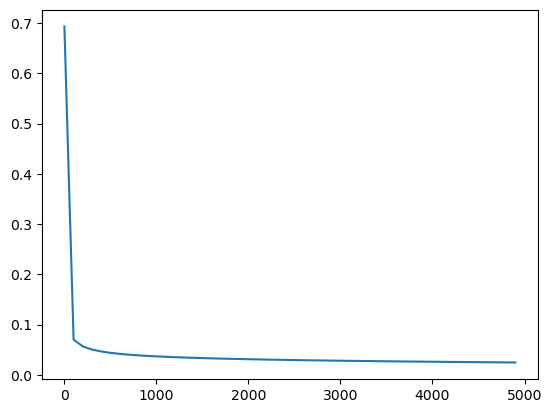

In [45]:
plt.plot(iterNum, costs)
plt.show()

Best Threshold - 0.6 (Accuracy: 97.9%)

In [46]:
# constant learning rate, changing thresholds
threshold_list = [0.4, 0.5, 0.6, 0.7]
learning_rate = 0.5

for thresh in threshold_list:
    w = fit(X_train, y_train, learning_rate, 5000)
    y_pr = logistic_predict(X_test, w, thresh)
    precision, recall, f_score, accuracy = scores(y_test, y_pr)
    print("Threshold: ", thresh)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F score: ", f_score)
    print("Accuracy: ", accuracy)
    print("----------------------------------------")

Threshold:  0.4
Precision:  0.6713286713286714
Recall:  1.0
F score:  0.8033472803347281
Accuracy:  0.6713286713286714
----------------------------------------
Threshold:  0.5
Precision:  0.7218045112781954
Recall:  1.0
F score:  0.8384279475982532
Accuracy:  0.7412587412587412
----------------------------------------
Threshold:  0.6
Precision:  0.979381443298969
Recall:  0.9895833333333334
F score:  0.9844559585492227
Accuracy:  0.9790209790209791
----------------------------------------
Threshold:  0.7
Precision:  0.978494623655914
Recall:  0.9479166666666666
F score:  0.962962962962963
Accuracy:  0.951048951048951
----------------------------------------


Best Learning Rate: 20 (Accuracy: 87.4%)

In [47]:
# constant threshold, changing learning rate
threshold = 0.5
learning_rate_list = [0.00001, 0.002, 0.7, 1.5, 5, 10, 20]

for rate in learning_rate_list:
    w = fit(X_train, y_train, rate, 700)
    y_pr = logistic_predict(X_test, w, threshold)
    precision, recall, f_score, accuracy = scores(y_test, y_pr)
    print("Learning Rate: ", rate)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F score: ", f_score)
    print("Accuracy: ", accuracy)
    print("----------------------------------------")

Learning Rate:  1e-05
Precision:  0.6713286713286714
Recall:  1.0
F score:  0.8033472803347281
Accuracy:  0.6713286713286714
----------------------------------------
Learning Rate:  0.002
Precision:  0.6713286713286714
Recall:  1.0
F score:  0.8033472803347281
Accuracy:  0.6713286713286714
----------------------------------------
Learning Rate:  0.7
Precision:  0.676056338028169
Recall:  1.0
F score:  0.8067226890756303
Accuracy:  0.6783216783216783
----------------------------------------
Learning Rate:  1.5
Precision:  0.6857142857142857
Recall:  1.0
F score:  0.8135593220338984
Accuracy:  0.6923076923076923
----------------------------------------
Learning Rate:  5
Precision:  0.7384615384615385
Recall:  1.0
F score:  0.8495575221238938
Accuracy:  0.7622377622377622
----------------------------------------
Learning Rate:  10
Precision:  0.7804878048780488
Recall:  1.0
F score:  0.8767123287671234
Accuracy:  0.8111888111888111
----------------------------------------
Learning Rate:  